In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./Data/health.csv')

In [8]:
df.columns = ['date','sales']

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.head()

,date,sales
0,2019-01-01,36
1,2019-01-02,45
2,2019-01-03,41
3,2019-01-04,40
4,2019-01-05,40


<Axes: xlabel='date'>

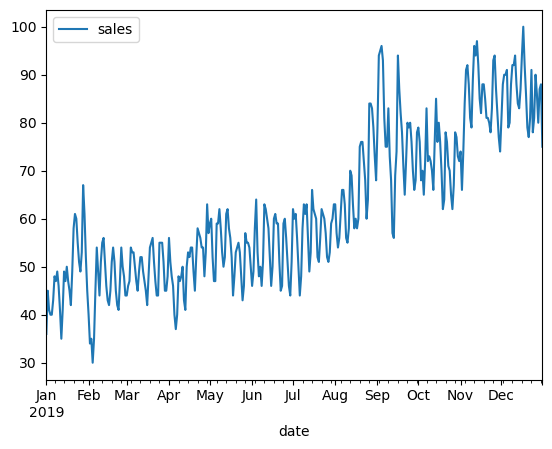

In [12]:
df.plot(x = 'date', y = 'sales')

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [16]:
deconposition = seasonal_decompose(df['sales'], period = 7)

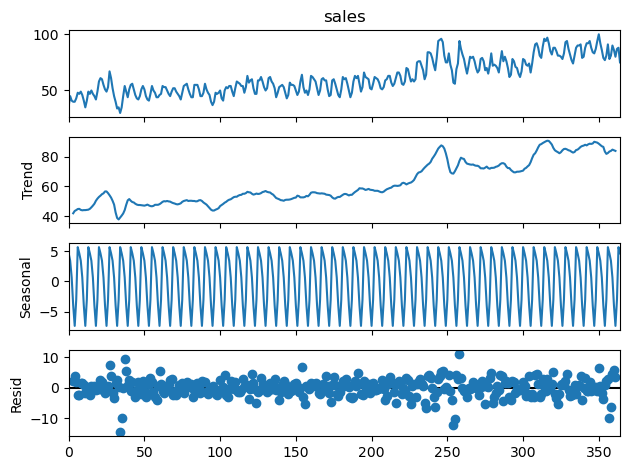

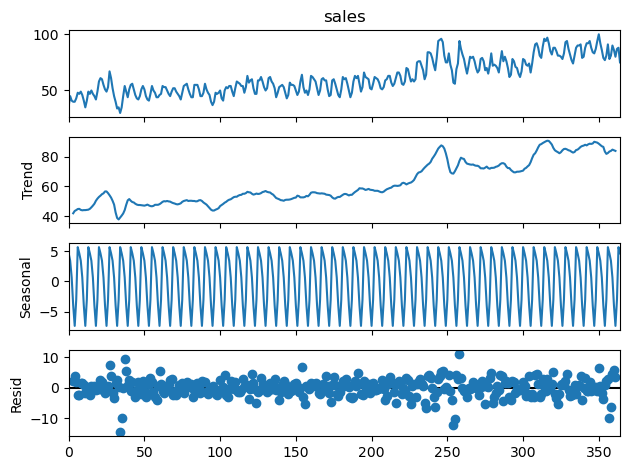

In [19]:
deconposition.plot()

In [21]:
result = pd.DataFrame({'trend':deconposition.trend, 'cycle': deconposition.seasonal , 'residual': deconposition.resid})
result.index = df['date']
result

,trend,cycle,residual
date,,,
2019-01-01,NaN,4.655385,NaN
2019-01-02,NaN,3.425693,NaN
2019-01-03,NaN,0.635777,NaN
2019-01-04,41.857143,-3.984078,2.126935
2019-01-05,43.428571,-7.379683,3.951111
...,...,...,...
2019-12-27,84.285714,-3.984078,5.698364
2019-12-28,83.857143,-7.379683,3.522540
2019-12-29,NaN,-3.019685,NaN


In [22]:
result.cycle.iloc[0:7]

date
2019-01-01    4.655385
2019-01-02    3.425693
2019-01-03    0.635777
2019-01-04   -3.984078
2019-01-05   -7.379683
2019-01-06   -3.019685
2019-01-07    5.666590
Name: cycle, dtype: float64

In [23]:
result.cycle.iloc[7:14]

date
2019-01-08    4.655385
2019-01-09    3.425693
2019-01-10    0.635777
2019-01-11   -3.984078
2019-01-12   -7.379683
2019-01-13   -3.019685
2019-01-14    5.666590
Name: cycle, dtype: float64

In [83]:
import statsmodels.api as sm

train = df['sales'].loc[:270]
test = df['sales'].loc[270:]

y = np.asarray(train, dtype = float)
model = sm.tsa.SARIMAX(y , order = (7,1,7))


In [84]:
res = model.fit()
res.summary()

C:\Users\125\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\125\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  271
Model:               SARIMAX(7, 1, 7)   Log Likelihood                -725.550
Date:                Thu, 28 Aug 2025   AIC                           1481.100
Time:                        16:32:51   BIC                           1535.076
Sample:                             0   HQIC                          1502.774
                                - 271                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0362      0.048     -0.758      0.449      -0.130       0.057
ar.L2         -0.0590      0.045     -1.326      0.185      -0.146       0.028
ar.L3         -0.0465      0.053     -0.883      0.377      -0.150       0.057
ar.L4         -0.0475      0.045     -1.045      0.296      -0.136       0.042
ar.L5         -0.0415      0.050     -0.821      0.411      -0.140       0.057
ar.L6         -0.0508      0.046     -1.101      0.271      -0.141       0.040
ar.L7          0.9462      0.046     20.432      0.000       0.855       1.037
ma.L1         -0.0458      0.050     -0.913      0.361      -0.144       0.053
ma.L2          0.0169      0.071      0.238      0.812      -0.122       0.156
ma.L3          0.0059      0.056      0.105      0.916      -0.103       0.115
ma.L4         -0.0446      0.072     -0.622      0.534      -0.185       0.096
ma.L5          0.0514      0.079      0.650      0.516      -0.104       0.206
ma.L6          0.0103      0.054      0.191      0.848      -0.096       0.116
ma.L7         -0.9005      0.080    -11.243      0.000      -1.057      -0.744
sigma2        11.1021      1.023     10.847      0.000       9.096      13.108
===================================================================================
Ljung-Box (L1) (Q):                   2.24   Jarque-Bera (JB):                74.09
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.36
Prob(H) (two-sided):                  0.34   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
forecast = res.get_forecast(steps = len(test)+30).predicted_mean

In [86]:
forecast

array([69.04880176, 80.21232235, 78.17910619, 75.33296736, 71.21481833,
       65.84701405, 64.28530086, 67.38763729, 78.59716136, 76.7269861 ,
       73.80124477, 69.78945368, 64.53414581, 63.08610344, 66.21806542,
       77.44806965, 75.71867821, 72.69446757, 68.76577868, 63.60519483,
       62.25191968, 65.39681528, 76.62871366, 75.02435083, 71.88907917,
       68.0262178 , 62.94817836, 61.67619708, 64.82243833, 76.04256889,
       74.55206694, 71.2975923 , 67.4875304 , 62.48379649, 61.28349219,
       64.42309897, 75.62129811, 74.23672171, 70.85805877, 67.09078721,
       62.15589101, 61.02038857, 64.14792963, 75.31652235, 74.0322094 ,
       70.52661348, 66.79427306, 61.92468974, 60.84906616, 63.96090948,
       75.09399431, 73.90587717, 70.27219506, 66.56846148, 61.76202297,
       60.74274797, 63.83653028, 74.92947267, 73.83459792, 70.07280773,
       66.39245645, 61.64793651, 60.682476  , 63.75672743, 74.80580092,
       73.80198963, 69.91287452, 66.25147288, 61.56829343, 60.65

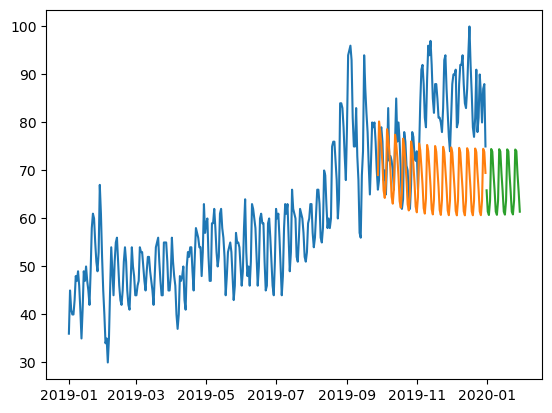

In [87]:
future = pd.date_range(start = '2020-01-01' , end = '2020-01-30')
plt.plot(df['date'], df['sales'])
plt.plot(df['date'].loc[270:], forecast[:len(test)])
plt.plot(future,  forecast[len(test):])

데이터가 너무 없어서 주기인지 추세인지 제대로 학습을 못함